In [1]:
from google.colab import drive
drive.mount('/content/driver', force_remount=True)

Mounted at /content/driver


In [2]:
import xgboost as xgb
from glob import glob
import pandas as pd
from sklearn.metrics import mean_squared_error
import numpy as np

path_train = '/content/driver/My Drive/XGBoost/datacsv/k62/train/*.csv'
files = glob(path_train)

li = []
for filename in files:
    df = pd.read_csv(filename, index_col = None, header = 0)
    li.append(df)

dataFrame = pd.concat(li, axis = 0, ignore_index = True)
X_train, y_train = dataFrame.iloc[:, [2, 3]], dataFrame.iloc[:, 7]
print('X_train:')
print(X_train)
print('y_train:')
print(y_train)

# Chọn 1 trong 2 cách test dưới đây
# Cách 1: Test nhiều dự án
path_test = '/content/driver/My Drive/XGBoost/datacsv/k62/test/*.csv'
files2 = glob(path_test)

li2 = []
for filename in files2:
    df = pd.read_csv(filename, index_col = None, header = 0)
    li2.append(df)

dataFrame2 = pd.concat(li2, axis = 0, ignore_index = True)
X_test, y_test = dataFrame2.iloc[:, [2, 3]], dataFrame2.iloc[:, 7]
print('X_test:')
print(X_test)
print('y_test:')
print(y_test)

# Cách 2: Test 1 dự án (cần nhập vào mã dự án)
# dtest = pd.read_csv("/content/driver/My Drive/XGBoost/datacsv/k62/test/C2011-13.csv")
# X_test, y_test = dtest.iloc[:, [2, 3]], dtest.iloc[:, 7]
# print('X_test:')
# print(X_test)
# print('y_test:')
# print(y_test)

X_train:
            XT          AC
0     0.564637  300587.056
1     0.776869  411441.676
2     0.822728  426824.666
3     0.924301  475424.136
4     1.000000  512546.146
..         ...         ...
942  10.409894   58410.000
943   0.100353    1185.000
944   0.451567    4560.000
945   0.851602    8790.000
946   1.000000    9990.000

[947 rows x 2 columns]
y_train:
0      512546.146
1      512546.146
2      512546.146
3      512546.146
4      512546.146
          ...    
942      9990.000
943      9990.000
944      9990.000
945      9990.000
946      9990.000
Name: TOTAL_AC, Length: 947, dtype: float64
X_test:
           XT             AC
0    0.001682     842.579987
1    0.001805     904.299988
2    0.389258  198466.050842
3    0.389258  198466.050842
4    0.585714  311426.571915
..        ...            ...
696  0.963685  478774.092502
697  0.975222  484186.149686
698  0.977656  485435.006846
699  0.997240  494234.712516
700  1.000000  494947.712516

[701 rows x 2 columns]
y_test:
0   

In [4]:
from sklearn.model_selection import GridSearchCV
from joblib import dump

xg_reg = xgb.XGBRegressor()

parameters = {}
parameters['base_score'] = [0.5]
parameters['booster'] = ['gbtree']
parameters['colsample_bylevel'] = [1]
parameters['colsample_bynode'] = [1]
parameters['colsample_bytree'] = [1]
parameters['gamma'] = [0, 1]
parameters['importance_type'] = ['gain']
parameters['learning_rate'] = [0.1, 0.09, 0.05, 0.01]
parameters['max_delta_step'] = [0]
parameters['max_depth'] = [3, 4, 5]
parameters['min_child_weight'] = [1]
parameters['missing'] = [None]
parameters['n_estimators'] = [100, 1000]
parameters['n_jobs'] = [1]
parameters['nthread'] = [None]
parameters['objective'] = ['reg:linear']
parameters['random_state'] = [0]
parameters['reg_alpha'] = [0]
parameters['reg_lambda'] = [1]
parameters['scale_pos_weight'] = [1]
parameters['seed'] = [None]
parameters['silent'] = [None]
parameters['subsample'] = [1, 0.8, 0.9]
parameters['verbosity'] = [1]

xgb_grid = GridSearchCV(xg_reg,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose = True)

xgb_grid.fit(X_train,
             y_train,
             eval_set = [(X_train, y_train), (X_test, y_test)],
             early_stopping_rounds = 50,
             verbose=True)

# print ra điểm tốt nhất
print('xgb_grid.best_score_:')
print(xgb_grid.best_score_)

# print ra params tốt nhất
print('xgb_grid.best_params_:')
print(xgb_grid.best_params_)

# lưu model để sau dùng
dump(xgb_grid, "/content/driver/My Drive/XGBoost/code/k62/XTAC_DOAN_TOTALAC_XTAT_DOAN_TOTALAT/AC_trained_model.joblib.dat")

Fitting 2 folds for each of 144 candidates, totalling 288 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   20.3s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.0min


[07:29:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:9.31674e+06	validation_1-rmse:1.95108e+07
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:8.54533e+06	validation_1-rmse:1.86066e+07
[2]	validation_0-rmse:7.83134e+06	validation_1-rmse:1.77236e+07
[3]	validation_0-rmse:7.19222e+06	validation_1-rmse:1.69323e+07
[4]	validation_0-rmse:6.62528e+06	validation_1-rmse:1.62703e+07
[5]	validation_0-rmse:6.12084e+06	validation_1-rmse:1.57111e+07
[6]	validation_0-rmse:5.67211e+06	validation_1-rmse:1.5139e+07
[7]	validation_0-rmse:5.27851e+06	validation_1-rmse:1.46387e+07
[8]	validation_0-rmse:4.91331e+06	validation_1-rmse:1.42407e+07
[9]	validation_0-rmse:4.60277e+06	validation_1-rmse:1.3835e+07
[10]	validation_0-rmse:4.33183e+06	validation_1-rmse:1.35056e+07
[11]	valida

[Parallel(n_jobs=5)]: Done 288 out of 288 | elapsed:  3.2min finished


[52]	validation_0-rmse:1.00888e+06	validation_1-rmse:9.26058e+06
[53]	validation_0-rmse:997631	validation_1-rmse:9.24662e+06
[54]	validation_0-rmse:990097	validation_1-rmse:9.23197e+06
[55]	validation_0-rmse:979070	validation_1-rmse:9.22322e+06
[56]	validation_0-rmse:976187	validation_1-rmse:9.21206e+06
[57]	validation_0-rmse:962834	validation_1-rmse:9.18786e+06
[58]	validation_0-rmse:955764	validation_1-rmse:9.18669e+06
[59]	validation_0-rmse:950662	validation_1-rmse:9.17914e+06
[60]	validation_0-rmse:942233	validation_1-rmse:9.17703e+06
[61]	validation_0-rmse:929454	validation_1-rmse:9.16023e+06
[62]	validation_0-rmse:922950	validation_1-rmse:9.15178e+06
[63]	validation_0-rmse:910134	validation_1-rmse:9.14289e+06
[64]	validation_0-rmse:900694	validation_1-rmse:9.12963e+06
[65]	validation_0-rmse:890329	validation_1-rmse:9.11216e+06
[66]	validation_0-rmse:884537	validation_1-rmse:9.10268e+06
[67]	validation_0-rmse:878645	validation_1-rmse:9.10245e+06
[68]	validation_0-rmse:864252	valid

['/content/driver/My Drive/XGBoost/code/k62/XTAC_DOAN_TOTALAC_XTAT_DOAN_TOTALAT/AC_trained_model.joblib.dat']

In [10]:
from joblib import load
import math

loaded_model = load("/content/driver/My Drive/XGBoost/code/k62/XTAC_DOAN_TOTALAC_XTAT_DOAN_TOTALAT/AC_trained_model.joblib.dat")

preds = loaded_model.predict(X_test)

# Thông tin test
y_test_ward = np.concatenate((y_test, np.array([0])))
count_test = 0
len_of_test = np.array([])
tmp = 1
for element in range(len(y_test_ward) - 1):
    if y_test_ward[element] != y_test_ward[element + 1]:
        count_test = count_test + 1
        len_of_test = np.concatenate((len_of_test, np.array([tmp])))
        tmp = 1
    else:
        tmp = tmp + 1
start_of_test = np.array([0])
for element in range(1, count_test):
    start_of_test = np.concatenate((start_of_test, np.array([ len_of_test[element - 1] + start_of_test[element - 1] ])))
print('count_test:')
print(count_test)
print('len_of_test:')
print(len_of_test)
print('start_of_test:')
print(start_of_test)

# Tất cả thời điểm
# Ví dụ có 100 lần báo cáo công việc, ta áp mô hình vào 100 lần đó rồi dự đoán
# Sau đó áp mô hình một cách tương tự vào tất cả các lần của các dự án còn lại trong tập test
# Tính trung bình được kết quẩ
def mean_absolute_percentage_error(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    # print('y_true:')
    # print(y_true)
    # print('y_pred:')
    # print(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# 25%
# Ví dụ có 100 lần báo cáo công việc, ta áp mô hình vào lần báo cáo 25 rồi dự đoán
# Trường hợp số lần báo cáo công việc không chia hết cho 4, ta lấy lần gần nhất chưa vượt quá 25%
# Ví dụ có 99 lần báo cáo công việc, ta áp mô hình vào lần báo cáo 24 rồi dự đoán
# Sau đó áp mô hình một cách tương tự vào tất cả các lần báo cáo ở thời điểm 25% của các dự án còn lại trong tập test
# Tính trung bình được kết quẩ
# Có một vấn đề với con số 25%: Khi dự án có không quá 3 lần báo cáo, ta không lấy được đầu vào để dự đoán
def mean_absolute_percentage_error_25(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    y_true_25 = np.array([])
    y_pred_25 = np.array([])
    for element in range(count_test):
        t = start_of_test[element] + math.floor(len_of_test[element] / 4)
        y_true_25 = np.concatenate((y_true_25, np.array([ y_true[ int(t.item()) ] ])))
        y_pred_25 = np.concatenate((y_pred_25, np.array([ y_pred[ int(t.item()) ] ])))
    # print('y_true:')
    # print(y_true)
    # print('y_true_25:')
    # print(y_true_25)
    # print('y_pred:')
    # print(y_pred)
    # print('y_pred_25:')
    # print(y_pred_25)
    return np.mean(np.abs((y_true_25 - y_pred_25) / y_true_25)) * 100

# 1->25%
# Tương tự với 25%, khác ở chỗ thay vì chỉ lấy 1 lần báo cáo ở thời điểm 25%, ta lấy từ đầu tới thời điểm đó
def mean_absolute_percentage_error_1_to_25(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    y_true_1_to_25 = np.array([])
    y_pred_1_to_25 = np.array([])
    for element in range(count_test):
        t = start_of_test[element] + math.floor(len_of_test[element] / 4)
        for t_value in range( int(start_of_test[element].item()), int(t.item()) ):
        # Chọn vòng for dưới này khi ta muốn lấy từ đầu tới thời điểm vừa mới vượt quá 25%
        # Ưu điểm: Lấy được đầu vào với những dự án không quá 3 lần báo cáo
        # for t_value in range( int(start_of_test[element].item()), int(t.item()) + 1 ):
            y_true_1_to_25 = np.concatenate((y_true_1_to_25, np.array([ y_true[ t_value ] ])))
            y_pred_1_to_25 = np.concatenate((y_pred_1_to_25, np.array([ y_pred[ t_value ] ])))
    # print('y_true:')
    # print(y_true)
    # print('y_true_1_to_25:')
    # print(y_true_1_to_25)
    # print('y_pred:')
    # print(y_pred)
    # print('y_pred_1_to_25:')
    # print(y_pred_1_to_25)
    return np.mean(np.abs((y_true_1_to_25 - y_pred_1_to_25) / y_true_1_to_25)) * 100

# 50%
# Tương tự 25%
def mean_absolute_percentage_error_50(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    y_true_50 = np.array([])
    y_pred_50 = np.array([])
    for element in range(count_test):
        t = start_of_test[element] + math.floor(len_of_test[element] / 2)
        y_true_50 = np.concatenate((y_true_50, np.array([ y_true[ int(t.item()) ] ])))
        y_pred_50 = np.concatenate((y_pred_50, np.array([ y_pred[ int(t.item()) ] ])))
    # print('y_true:')
    # print(y_true)
    # print('y_true_50:')
    # print(y_true_50)
    # print('y_pred:')
    # print(y_pred)
    # print('y_pred_50:')
    # print(y_pred_50)
    return np.mean(np.abs((y_true_50 - y_pred_50) / y_true_50)) * 100

# 1->50%
# Tương tự 1->25%
def mean_absolute_percentage_error_1_to_50(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    y_true_1_to_50 = np.array([])
    y_pred_1_to_50 = np.array([])
    for element in range(count_test):
        t = start_of_test[element] + math.floor(len_of_test[element] / 2)
        for t_value in range( int(start_of_test[element].item()), int(t.item()) ):
            y_true_1_to_50 = np.concatenate((y_true_1_to_50, np.array([ y_true[ t_value ] ])))
            y_pred_1_to_50 = np.concatenate((y_pred_1_to_50, np.array([ y_pred[ t_value ] ])))
    # print('y_true:')
    # print(y_true)
    # print('y_true_1_to_50:')
    # print(y_true_1_to_50)
    # print('y_pred:')
    # print(y_pred)
    # print('y_pred_1_to_50:')
    # print(y_pred_1_to_50)
    return np.mean(np.abs((y_true_1_to_50 - y_pred_1_to_50) / y_true_1_to_50)) * 100

mape = mean_absolute_percentage_error(y_test, preds)
mape25 = mean_absolute_percentage_error_25(y_test, preds)
mape1to25 = mean_absolute_percentage_error_1_to_25(y_test, preds)
mape50 = mean_absolute_percentage_error_50(y_test, preds)
mape1to50 = mean_absolute_percentage_error_1_to_50(y_test, preds)

print("Độ chính xác trung bình của dữ liệu K62:")
print('Tất cả thời điểm:')
print(100 - mape)
print('25%:')
print(100 - mape25)
print('1 -> 25%:')
print(100 - mape1to25)
print('50%:')
print(100 - mape50)
print('1 -> 50%:')
print(100 - mape1to50)

# rmse = np.sqrt(mean_squared_error(y_test, preds))

[10:14:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
count_test:
39
len_of_test:
[ 13.   6.  11.  17.  18.  30.  18.  10.  11.  31.   6.  20.   5.   2.
   5.   5.   9.  36.  19.  13.  14.  13.  29.  24.  13.  10.   9.   8.
   9.   9.   5.  41.   7.  28. 120.   8.   5.  23.  41.]
start_of_test:
[  0.  13.  19.  30.  47.  65.  95. 113. 123. 134. 165. 171. 191. 196.
 198. 203. 208. 217. 253. 272. 285. 299. 312. 341. 365. 378. 388. 397.
 405. 414. 423. 428. 469. 476. 504. 624. 632. 637. 660.]
Độ chính xác trung bình của dữ liệu K62:
Tất cả thời điểm:
69.93725874637175
25%:
59.655692551017765
1 -> 25%:
49.257202357702
50%:
75.15346056527913
1 -> 50%:
61.38517343516547


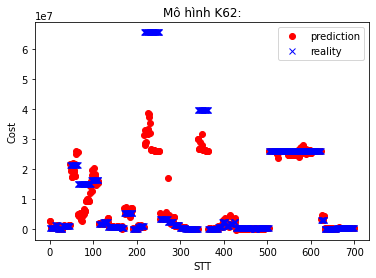

In [8]:
import matplotlib.pyplot as plt

plt.plot(preds, 'o', color = 'r')
plt.plot(y_test, 'x', color = 'b')
plt.title("Mô hình K62:")
plt.xlabel("STT")
plt.ylabel("Cost")

plt.legend(('prediction', 'reality'), loc = 'upper right')

plt.show()